In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('fr.openfoodfacts.org.products.csv', sep = '\t', low_memory=False, encoding = 'utf-8', skipinitialspace=True)

In [3]:
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(320772, 162)

In [5]:
pd.options.display.max_columns = 200
df.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [6]:
df.notnull().sum().sum()

12356406

In [7]:
df.isnull().sum().sum()

39608658

In [8]:
# % NaN
(df.isnull().sum().sum()/(df.shape[0] * df.shape[1])*100).round(2)

76.22

In [9]:
df.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [10]:
df.pnns_groups_1.unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'fruits-and-vegetables',
       'Milk and dairy products', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [11]:
df=df.loc[df["pnns_groups_1"]=='Composite foods']
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
185,0000008237798,http://world-fr.openfoodfacts.org/produit/0000...,b7,1491943307,2017-04-11T20:41:47Z,1491944488,2017-04-11T21:01:28Z,Quiche Lorraine,Quiche lorraine,1 400 kg,Frai,frai,Kirkland Signature,kirkland-signature,Quiches lorraines,"en:meals,en:pizzas-pies-and-quiches,en:quiches...","Plats préparés,Pizzas tartes salées et quiches...",Québec,quebec,"Brossard,Québec","brossard,quebec",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Brossard,Québec",Costco,Canada,en:canada,Canada,INGRÉDIENTS : GARNITURE (SUBSTANCES LAITIÈRES....,NaN,NaN,NaN,NaN,NaN,280 g / 1/5 de la Quiche,NaN,3.0,[ ingredients -> fr:ingredients ] [ garnitur...,"en:e316,en:e407,en:e235","E316 - Erythorbate de sodium,E407 - Carraghéna...",0.0,NaN,NaN,0.0,NaN,NaN,NaN,b,Composite foods,Pizza pies and quiche,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:meals,Plats préparés,NaN,NaN,478.0,NaN,6.79,2.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0107,7.86,0.714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.357,5.36,NaN,NaN,NaN,0.49900,0.196000,NaN,0.000011,NaN,NaN,NaN,NaN,0.000429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0286,NaN,0.000643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0

In [12]:
df=df.dropna(subset = ['product_name'])
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
185,0000008237798,http://world-fr.openfoodfacts.org/produit/0000...,b7,1491943307,2017-04-11T20:41:47Z,1491944488,2017-04-11T21:01:28Z,Quiche Lorraine,Quiche lorraine,1 400 kg,Frai,frai,Kirkland Signature,kirkland-signature,Quiches lorraines,"en:meals,en:pizzas-pies-and-quiches,en:quiches...","Plats préparés,Pizzas tartes salées et quiches...",Québec,quebec,"Brossard,Québec","brossard,quebec",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Brossard,Québec",Costco,Canada,en:canada,Canada,INGRÉDIENTS : GARNITURE (SUBSTANCES LAITIÈRES....,NaN,NaN,NaN,NaN,NaN,280 g / 1/5 de la Quiche,NaN,3.0,[ ingredients -> fr:ingredients ] [ garnitur...,"en:e316,en:e407,en:e235","E316 - Erythorbate de sodium,E407 - Carraghéna...",0.0,NaN,NaN,0.0,NaN,NaN,NaN,b,Composite foods,Pizza pies and quiche,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:meals,Plats préparés,NaN,NaN,478.0,NaN,6.79,2.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0107,7.86,0.714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.357,5.36,NaN,NaN,NaN,0.49900,0.196000,NaN,0.000011,NaN,NaN,NaN,NaN,0.000429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0286,NaN,0.000643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0

In [13]:
pd.options.display.max_columns = 200
df.columns = df.columns.str.strip()
df=df[df['countries_fr']=='France']
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
12897,00159241,http://world-fr.openfoodfacts.org/produit/0015...,teolemon,1479106829,2016-11-14T07:00:29Z,1491823723,2017-04-10T11:28:43Z,Risotto Aux Crevettes,NaN,NaN,NaN,NaN,Marks&Spencer,marks-spencer,fr:Risottos aux crevettes,"en:meals,fr:risottos,en:shrimp-risottos","Plats préparés,Risottos,Risottos aux crevettes",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a,Composite foods,One-dish meals,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:meals,Plats préparés,NaN,NaN,452.0,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,4.3,NaN,NaN,NaN,0.45000,0.177165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN
13077,0016101000054,http://world-fr.openfoodfacts.org/produit/0016...,date-limite-app,1479679025,2016-11-20T21:57:05Z,1492259889,2017-04-15T12:38:09Z,Cassoulet,NaN,NaN,produit,produit,NaN,NaN,"fr:Plats à base de poisson,fr:Plats préparés à...","en:meals,en:microwave-meals,en:meals-

In [14]:
df=df.dropna(subset = ['nutrition_grade_fr'])
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
12897,00159241,http://world-fr.openfoodfacts.org/produit/0015...,teolemon,1479106829,2016-11-14T07:00:29Z,1491823723,2017-04-10T11:28:43Z,Risotto Aux Crevettes,NaN,NaN,NaN,NaN,Marks&Spencer,marks-spencer,fr:Risottos aux crevettes,"en:meals,fr:risottos,en:shrimp-risottos","Plats préparés,Risottos,Risottos aux crevettes",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a,Composite foods,One-dish meals,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:meals,Plats préparés,NaN,NaN,452.0,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,4.3,NaN,NaN,NaN,0.4500,0.177165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN
16580,002084329738,http://world-fr.openfoodfacts.org/produit/0020...,kipaul666,1481922590,2016-12-16T21:09:50Z,1481979935,2016-12-17T13:05:35Z,Pizza au thon,"Pizza à base de thon, edam, mozzarella et oign...",355 g,"Film,Plastique,Etui,Carton,Surgelé","film,plastique,etui,carton,sur

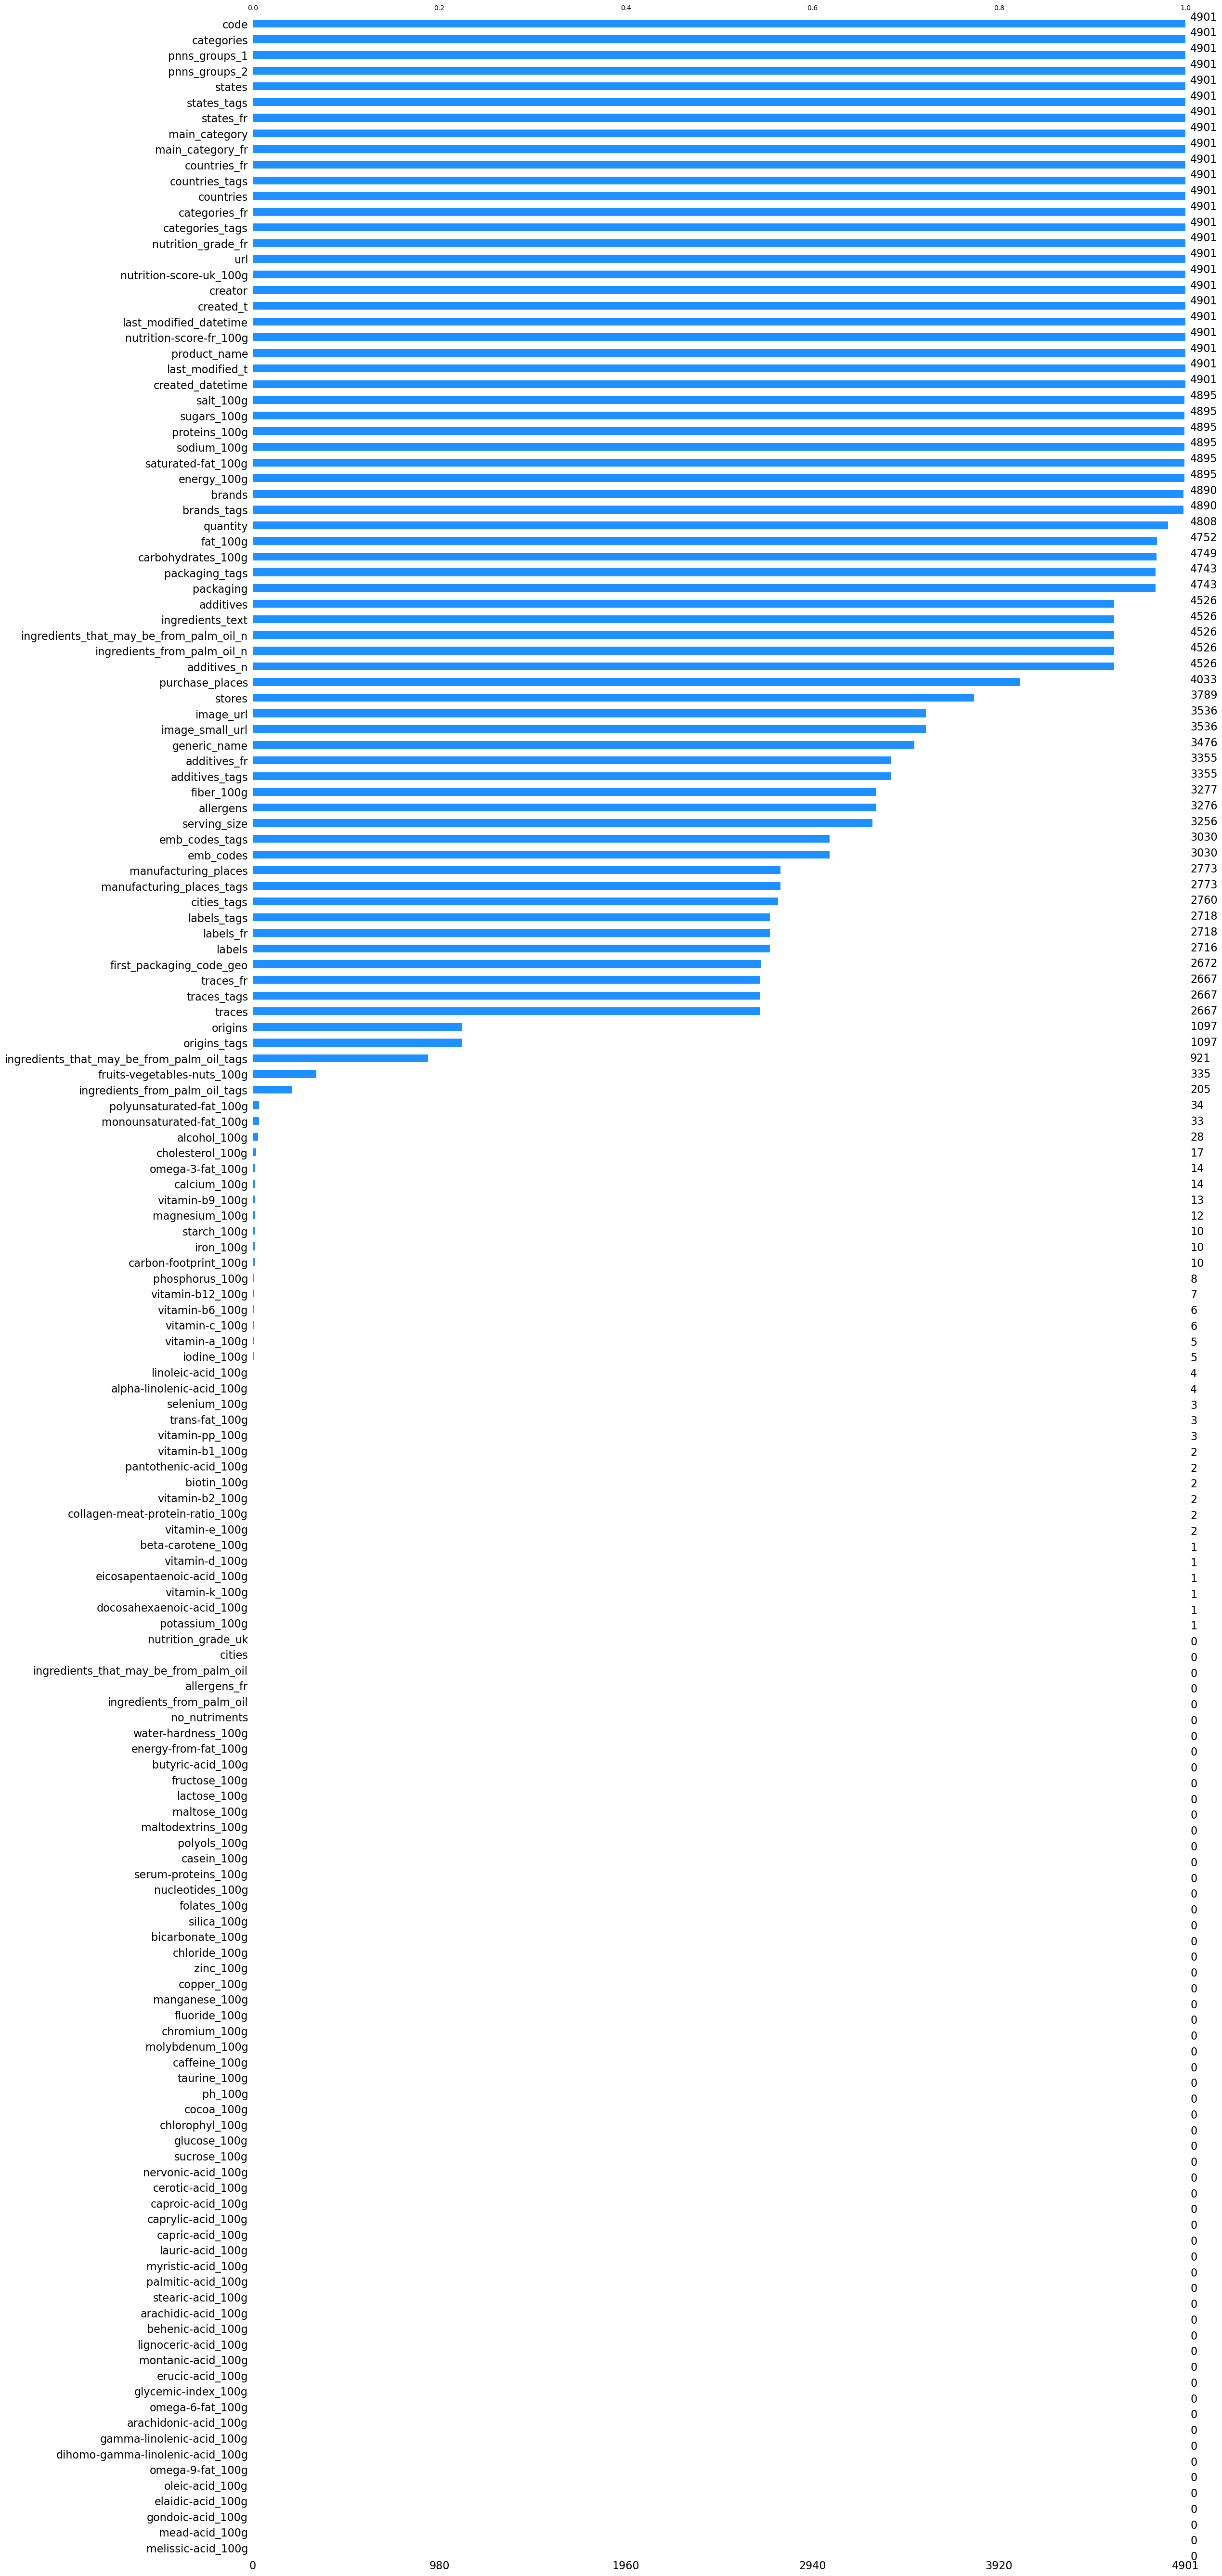

In [15]:
msno.bar(df,color="dodgerblue", sort="ascending" );

In [16]:
df1=df.drop(df.columns[df.isnull().mean()>=0.7], axis=1)
df1

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
12897,00159241,http://world-fr.openfoodfacts.org/produit/0015...,teolemon,1479106829,2016-11-14T07:00:29Z,1491823723,2017-04-10T11:28:43Z,Risotto Aux Crevettes,NaN,NaN,NaN,NaN,Marks&Spencer,marks-spencer,fr:Risottos aux crevettes,"en:meals,fr:risottos,en:shrimp-risottos","Plats préparés,Risottos,Risottos aux crevettes",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a,Composite foods,One-dish meals,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:meals,Plats préparés,NaN,NaN,452.0,NaN,0.9,NaN,1.3,0.8,4.3,0.4500,0.177165,-1.0,-1.0
16580,002084329738,http://world-fr.openfoodfacts.org/produit/0020...,kipaul666,1481922590,2016-12-16T21:09:50Z,1481979935,2016-12-17T13:05:35Z,Pizza au thon,"Pizza à base de thon, edam, mozzarella et oign...",355 g,"Film,Plastique,Etui,Carton,Surgelé","film,plastique,etui,carton,surgele",Toupargel,toupargel,"Plats préparés,Pizzas tartes salées et quiches...","en:frozen-foods,en:meals,en:pizzas-pies-and-qu...","Surgelés,Plats préparés,Pizzas tartes salées e...",Autriche,autriche,NaN,NaN,NaN,EMB 69194C,emb-69194c,"45.8,4.8",saint-didier-au-mont-d-or-rhone-france,"Bagneres de Bigorre,France",NaN,France,en:france,France,"Garniture (53,8%) : purée de tomates (34,5%), ...","thon, thon, edam, mozzarella, blé, blé, blé, b...","Céleri,Crustacés,Mollusques","en:celery,en:crustaceans,en:molluscs","Céleri,Crustacés,Mollusques",NaN,1.0,[ garniture -> fr:garniture ] [ 53 -> fr:53 ...,en:e160c,E160c - Extrait de paprika,0.0,1.0,c,Composite foods,Pizza pies and quiche,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:frozen-foods,Surgelés,NaN,NaN,1052.0,13.5,3.2,21.7,3.2,1.9,9.9,1.2000,0.472441,9.0,9.0
54663,0042272006168,http://world-fr.openfoodfacts.org/produit/0042...,akasha22,1452359159,2016-01-09T17:05:59Z,1452361598,2016-01-09T17:46:38Z,Soupe rustique aux légumes à l'italienne,Soupe de légumes,400 g,Conserve,conserve,Amy's kitchen,amy-s-kitchen,"Soupe,Conserve de légumes","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",États-Unis,etats-unis,"AB,Sans gluten,végétarien,AFDIAG,Végétalien","en:organic,en:vegetarian,en:eu-organic,en:glut...","Bio,Végétarien,Bio européen,Sans gluten,Végéta...",NaN,NaN,NaN,NaN,"Collégien,France",Carrefour,France,en:france,France,"Légumes 50% (oignons, tomates concassées, poiv...",NaN,NaN,NaN,NaN,NaN,0.0,[ legumes-50 -> fr:legumes-50 ] [ legumes ->...,NaN,NaN,0.0,0.0,a,Composite foods,One-dish meals,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:soups,Soupes,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,264.0,2.9,0.4,7.3,1.6,1.6,2.0,0.7620,0.300000,-5.0,-5.0
54695,0042272008568,http://world-fr.openfoodfacts.org/pro

In [17]:
df1['nutrition_grade_fr'] = df1['nutrition_grade_fr'].str.upper()
df1.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
12897,00159241,http://world-fr.openfoodfacts.org/produit/0015...,teolemon,1479106829,2016-11-14T07:00:29Z,1491823723,2017-04-10T11:28:43Z,Risotto Aux Crevettes,NaN,NaN,NaN,NaN,Marks&Spencer,marks-spencer,fr:Risottos aux crevettes,"en:meals,fr:risottos,en:shrimp-risottos","Plats préparés,Risottos,Risottos aux crevettes",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Composite foods,One-dish meals,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:meals,Plats préparés,NaN,NaN,452.0,NaN,0.9,NaN,1.3,0.8,4.3,0.45,0.177165,-1.0,-1.0
16580,002084329738,http://world-fr.openfoodfacts.org/produit/0020...,kipaul666,1481922590,2016-12-16T21:09:50Z,1481979935,2016-12-17T13:05:35Z,Pizza au thon,"Pizza à base de thon, edam, mozzarella et oign...",355 g,"Film,Plastique,Etui,Carton,Surgelé","film,plastique,etui,carton,surgele",Toupargel,toupargel,"Plats préparés,Pizzas tartes salées et quiches...","en:frozen-foods,en:meals,en:pizzas-pies-and-qu...","Surgelés,Plats préparés,Pizzas tartes salées e...",Autriche,autriche,NaN,NaN,NaN,EMB 69194C,emb-69194c,"45.8,4.8",saint-didier-au-mont-d-or-rhone-france,"Bagneres de Bigorre,France",NaN,France,en:france,France,"Garniture (53,8%) : purée de tomates (34,5%), ...","thon, thon, edam, mozzarella, blé, blé, blé, b...","Céleri,Crustacés,Mollusques","en:celery,en:crustaceans,en:molluscs","Céleri,Crustacés,Mollusques",NaN,1.0,[ garniture -> fr:garniture ] [ 53 -> fr:53 ...,en:e160c,E160c - Extrait de paprika,0.0,1.0,C,Composite foods,Pizza pies and quiche,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:frozen-foods,Surgelés,NaN,NaN,1052.0,13.5,3.2,21.7,3.2,1.9,9.9,1.20,0.472441,9.0,9.0


In [18]:
df1['additives_fr'].tolist()

[nan,
 'E160c - Extrait de paprika',
 nan,
 nan,
 nan,
 nan,
 nan,
 'E621 - Glutamate monosodique',
 'E450 - Sels métalliques de diphosphates',
 'E407 - Carraghénanes,E14XX - Amidons modifiés',
 nan,
 nan,
 "E503 - Carbonates d'ammonium,E407 - Carraghénanes",
 'E407 - Carraghénanes',
 'E250 - Nitrite de sodium',
 'E330 - Acide citrique',
 'E451 - Triphosphates,E407 - Carraghénanes,E316 - Erythorbate de sodium,E250 - Nitrite de sodium,E262 - Acétates de sodium',
 "E471 - Mono- et diglycérides d'acides gras alimentaires,E330 - Acide citrique,E160a - Bêta-carotène,E440 - Pectines,E150c - Caramel ammoniacal",
 nan,
 'E260 - Acide acétique,E330 - Acide citrique',
 'E220 - Anhydride sulfureux',
 nan,
 'E250 - Nitrite de sodium',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'E202 - Sorbate de potassium,E300 - Acide ascorbique,E415 - Gomme xanthane',
 'E451 - Triphosphates,E301 - Ascorbate de sodium,E250 - Nitrite de sodium,E579 - Gluconate ferreux

In [19]:
df1['additives_fr'] = df1['additives_fr'].str[:4]
df1.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
12897,00159241,http://world-fr.openfoodfacts.org/produit/0015...,teolemon,1479106829,2016-11-14T07:00:29Z,1491823723,2017-04-10T11:28:43Z,Risotto Aux Crevettes,NaN,NaN,NaN,NaN,Marks&Spencer,marks-spencer,fr:Risottos aux crevettes,"en:meals,fr:risottos,en:shrimp-risottos","Plats préparés,Risottos,Risottos aux crevettes",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Composite foods,One-dish meals,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:meals,Plats préparés,NaN,NaN,452.0,NaN,0.9,NaN,1.3,0.8,4.3,0.450,0.177165,-1.0,-1.0
16580,002084329738,http://world-fr.openfoodfacts.org/produit/0020...,kipaul666,1481922590,2016-12-16T21:09:50Z,1481979935,2016-12-17T13:05:35Z,Pizza au thon,"Pizza à base de thon, edam, mozzarella et oign...",355 g,"Film,Plastique,Etui,Carton,Surgelé","film,plastique,etui,carton,surgele",Toupargel,toupargel,"Plats préparés,Pizzas tartes salées et quiches...","en:frozen-foods,en:meals,en:pizzas-pies-and-qu...","Surgelés,Plats préparés,Pizzas tartes salées e...",Autriche,autriche,NaN,NaN,NaN,EMB 69194C,emb-69194c,"45.8,4.8",saint-didier-au-mont-d-or-rhone-france,"Bagneres de Bigorre,France",NaN,France,en:france,France,"Garniture (53,8%) : purée de tomates (34,5%), ...","thon, thon, edam, mozzarella, blé, blé, blé, b...","Céleri,Crustacés,Mollusques","en:celery,en:crustaceans,en:molluscs","Céleri,Crustacés,Mollusques",NaN,1.0,[ garniture -> fr:garniture ] [ 53 -> fr:53 ...,en:e160c,E160,0.0,1.0,C,Composite foods,Pizza pies and quiche,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:frozen-foods,Surgelés,NaN,NaN,1052.0,13.5,3.2,21.7,3.2,1.9,9.9,1.200,0.472441,9.0,9.0
54663,0042272006168,http://world-fr.openfoodfacts.org/produit/0042...,akasha22,1452359159,2016-01-09T17:05:59Z,1452361598,2016-01-09T17:46:38Z,Soupe rustique aux légumes à l'italienne,Soupe de légumes,400 g,Conserve,conserve,Amy's kitchen,amy-s-kitchen,"Soupe,Conserve de légumes","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",États-Unis,etats-unis,"AB,Sans gluten,végétarien,AFDIAG,Végétalien","en:organic,en:vegetarian,en:eu-organic,en:glut...","Bio,Végétarien,Bio européen,Sans gluten,Végéta...",NaN,NaN,NaN,NaN,"Collégien,France",Carrefour,France,en:france,France,"Légumes 50% (oignons, tomates concassées, poiv...",NaN,NaN,NaN,NaN,NaN,0.0,[ legumes-50 -> fr:legumes-50 ] [ legumes ->...,NaN,NaN,0.0,0.0,A,Composite foods,One-dish meals,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:soups,Soupes,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,264.0,2.9,0.4,7.3,1.6,1.6,2.0,0.762,0.300000,-5.0,-5.0
54695,0042272008568,http://world-fr.openfoodfacts.org/produit/0042...,tacite,14174

In [20]:
df1['additives_fr'].unique()

array([nan, 'E160', 'E621', 'E450', 'E407', 'E503', 'E250', 'E330',
       'E451', 'E471', 'E260', 'E220', 'E202', 'E14X', 'E326', 'E406',
       'E150', 'E322', 'E300', 'E282', 'E316', 'E410', 'E120', 'E325',
       'E301', 'E579', 'E917', 'E412', 'E415', 'E223', 'E224', 'E339',
       'E270', 'E461', 'E331', 'E262', 'E100', 'E162', 'E500', 'E110',
       'E472', 'E509', 'E428', 'E470', 'E140', 'E452', 'E310', 'E171',
       'E306', 'E441', 'E211', 'E222', 'E575', 'E508', 'E516', 'E511',
       'E392', 'E144', 'E420', 'E460', 'E251', 'E172', 'E320', 'E414',
       'E417', 'E551', 'E481', 'E482', 'E385', 'E334', 'E631', 'E252',
       'E263', 'E161', 'E464', 'E920', 'E440', 'E221', 'E341', 'E151',
       'E123', 'E422', 'E228', 'E401', 'E200', 'E501', 'E502', 'E535',
       'E524', 'E170', 'E526', 'E635'], dtype=object)

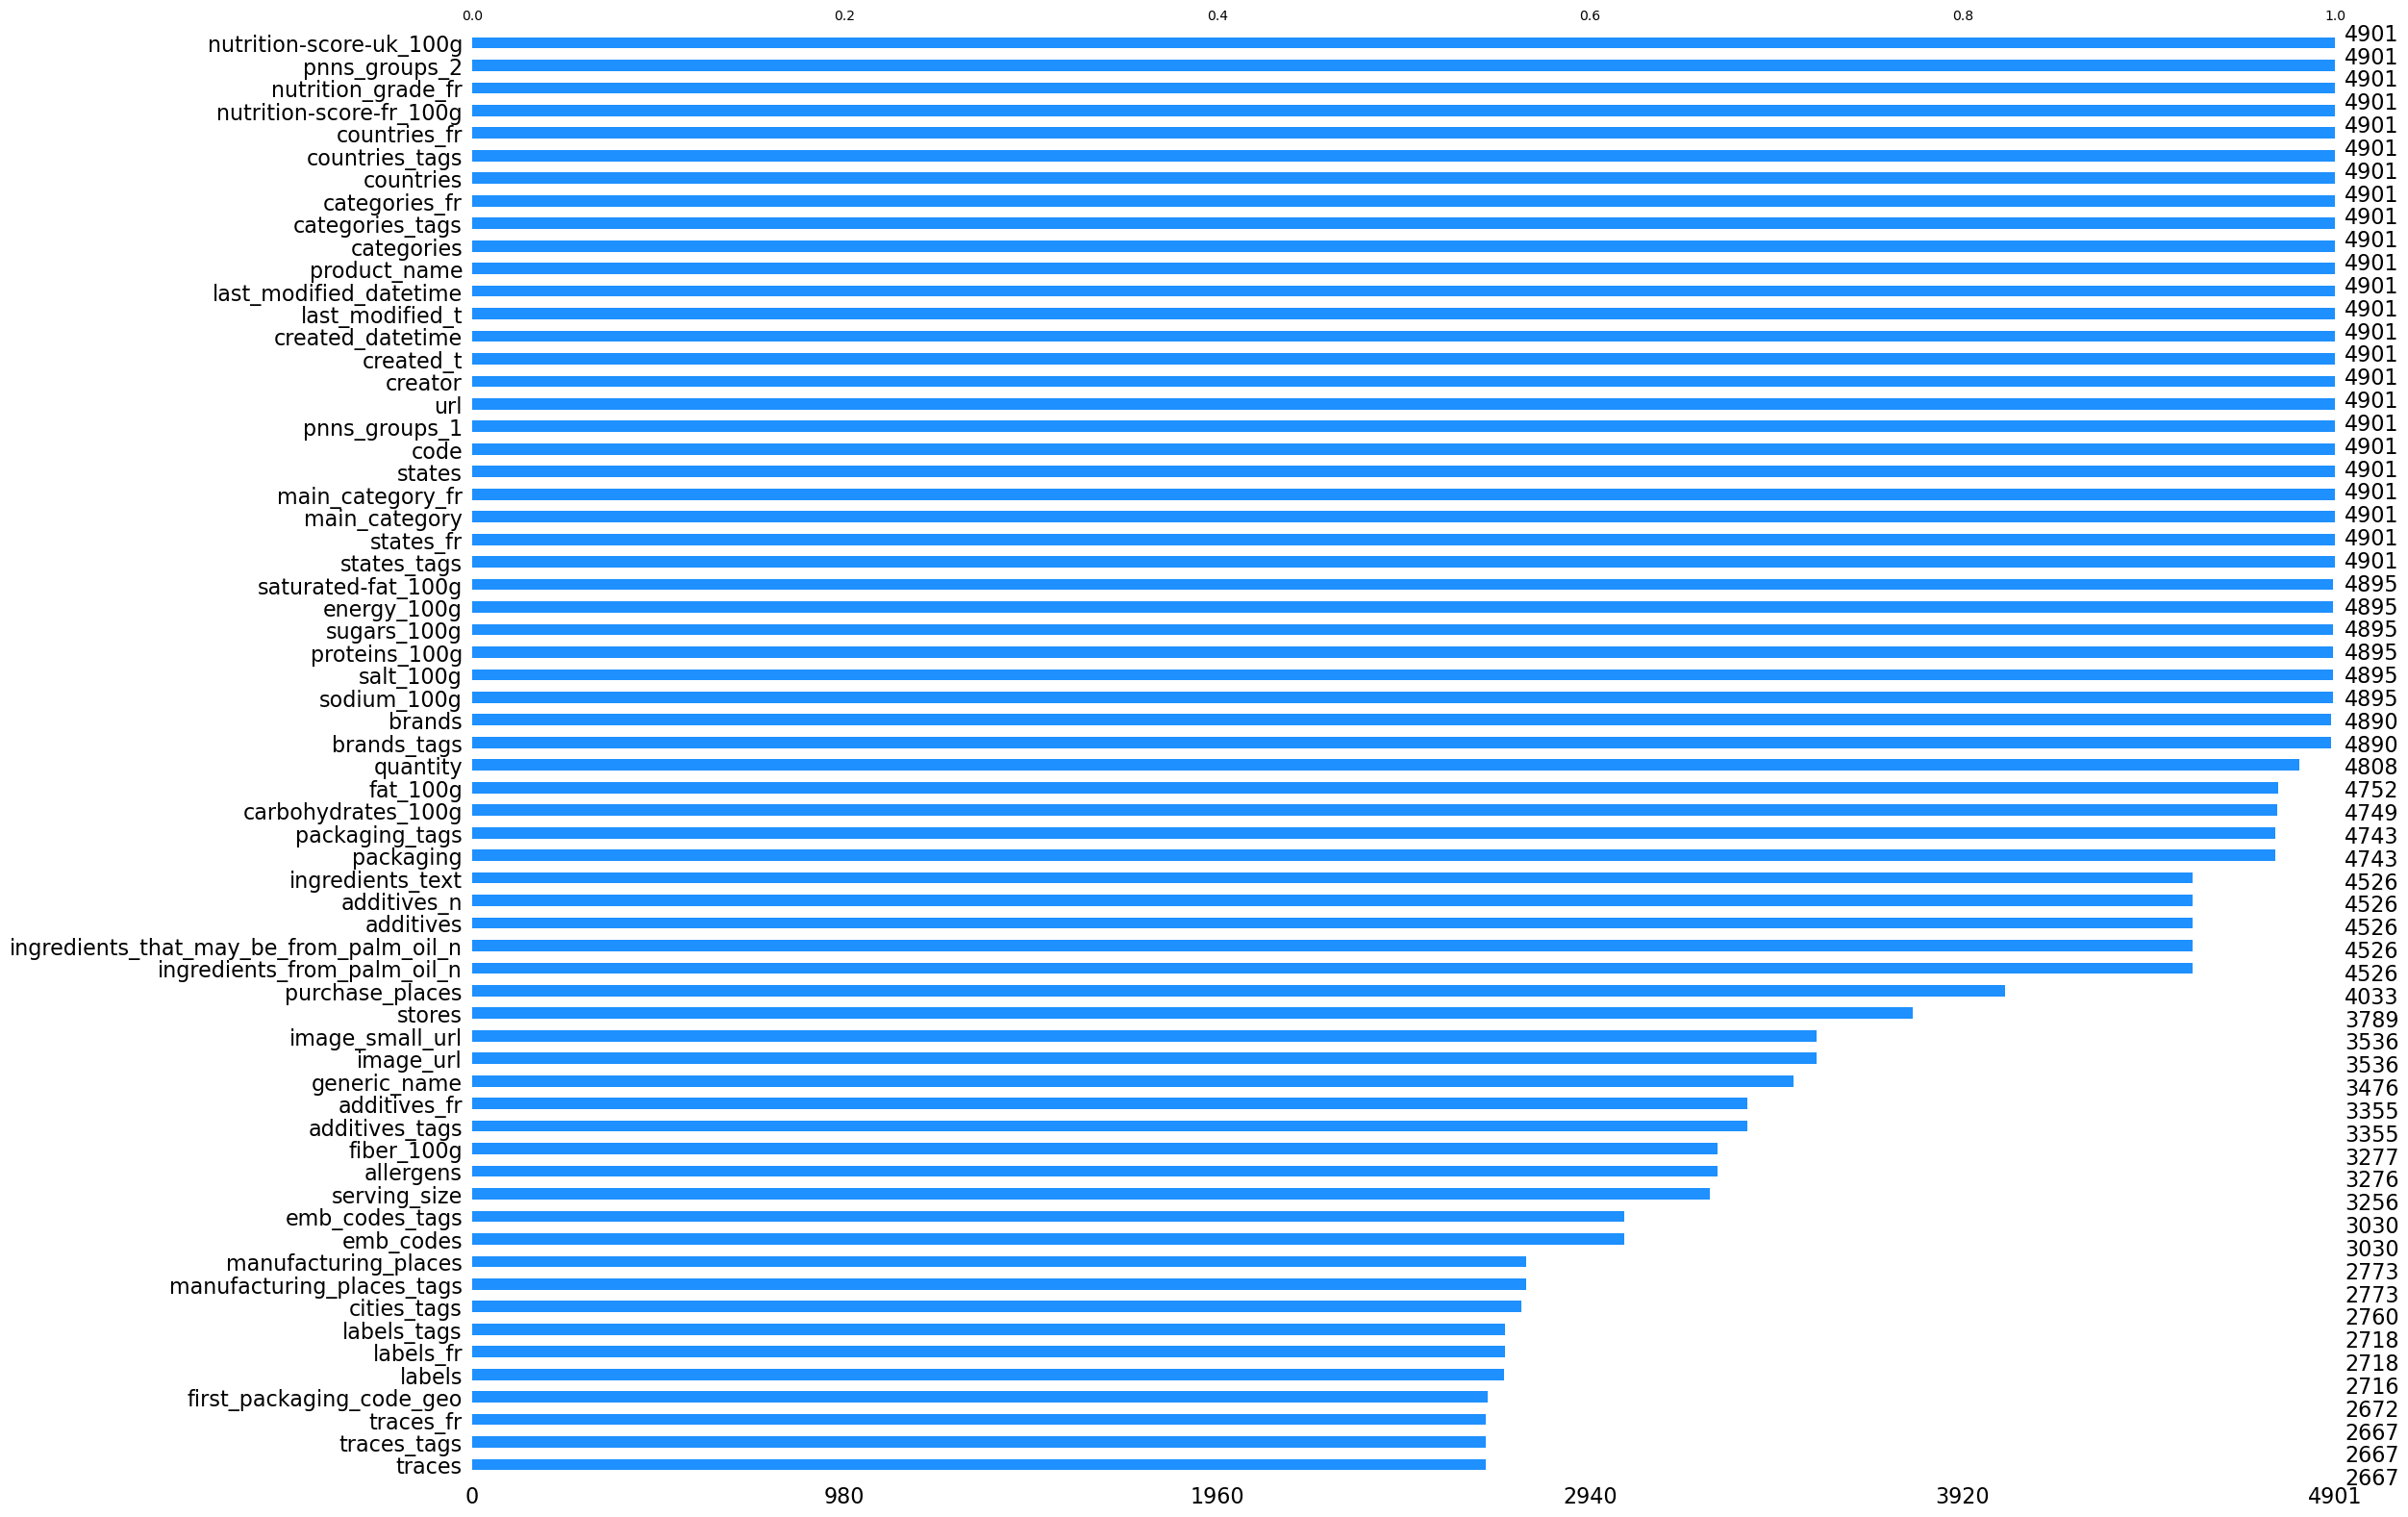

In [21]:
msno.bar(df1,color="dodgerblue", sort="ascending" );

In [22]:
df1=df1.loc[:,['product_name', 'brands', 'nutrition_grade_fr', 'energy_100g','additives_fr','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g', 'fiber_100g','proteins_100g','salt_100g','sodium_100g', 'nutrition-score-fr_100g']]
df1.head(50)

,product_name,brands,nutrition_grade_fr,energy_100g,additives_fr,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
12897,Risotto Aux Crevettes,Marks&Spencer,A,452.0,NaN,NaN,0.90,NaN,1.30,0.80,4.30,0.45000,0.177165,-1.0
16580,Pizza au thon,Toupargel,C,1052.0,E160,13.50,3.20,21.7,3.20,1.90,9.90,1.20000,0.472441,9.0
54663,Soupe rustique aux légumes à l'italienne,Amy's kitchen,A,264.0,NaN,2.90,0.40,7.3,1.60,1.60,2.00,0.76200,0.300000,-5.0
54695,"Lasagnes aux légumes, pâtes de riz sans gluten",Amy's Kitchen,B,541.0,NaN,5.50,2.70,15.0,2.40,1.60,5.50,0.76200,0.300000,1.0
54697,"4 Steaks aux légumes, au quinoa et aux noix",Amy's Kitchen,C,510.0,NaN,4.20,0.00,18.0,2.80,1.80,3.80,1.52400,0.600000,3.0
54698,Spaghettis Italiano avec boulettes végétales,Amy's Kitchen,A,450.0,NaN,1.90,0.20,18.0,2.70,1.90,4.70,0.20000,0.078740,-3.0
54739,Nouilles chinoises et légumes,Amy's kitchen,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
105761,Kimchi / Chou chinois,Wang,C,168.0,E621,0.00,0.00,6.7,2.50,NaN,2.50,2.87000,1.129921,9.0
106677,Falafel,Marks and Spencer,C,1063.0,E450,14.00,3.20,25.0,1.60,2.60,6.00,0.70000,0.275591,3.0
111625,Bisque de Homard,"Deluxe,Lidl Stiftung & Co. KG",B,181.0,E407,2.10,0.70,3.0,0.70,0.50,3.10,0.58000,0.228346,1.0


In [23]:
df1.duplicated().sum()

16

In [24]:
df1=df1.drop_duplicates(subset='product_name', keep='first')
df1

,product_name,brands,nutrition_grade_fr,energy_100g,additives_fr,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
12897,Risotto Aux Crevettes,Marks&Spencer,A,452.0,NaN,NaN,0.9,NaN,1.3,0.8,4.3,0.4500,0.177165,-1.0
16580,Pizza au thon,Toupargel,C,1052.0,E160,13.5,3.2,21.7,3.2,1.9,9.9,1.2000,0.472441,9.0
54663,Soupe rustique aux légumes à l'italienne,Amy's kitchen,A,264.0,NaN,2.9,0.4,7.3,1.6,1.6,2.0,0.7620,0.300000,-5.0
54695,"Lasagnes aux légumes, pâtes de riz sans gluten",Amy's Kitchen,B,541.0,NaN,5.5,2.7,15.0,2.4,1.6,5.5,0.7620,0.300000,1.0
54697,"4 Steaks aux légumes, au quinoa et aux noix",Amy's Kitchen,C,510.0,NaN,4.2,0.0,18.0,2.8,1.8,3.8,1.5240,0.600000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316146,Soupe Légumes du potager moulinés,Knorr,B,130.0,NaN,1.0,0.6,5.0,0.9,0.8,1.5,0.7366,0.290000,2.0
316197,4 Ch'ticanos,Bakx Foods,D,814.0,E621,11.1,3.0,11.8,1.4,NaN,11.9,1.9000,0.748031,12.0
316255,2 Meunières Tradition,Iglo,B,432.0,NaN,0.7,0.2,8.9,0.4,0.4,14.8,1.1000,0.433071,0.0
317217,Samoussas au poulet,"Authentic Asia,Charoen Pokphand,CP",C,1120.0,NaN,14.7,3.3,2.0,1.6,3.0,9.1,1.1900,0.468504,7.0


In [25]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
energy_100g,4361.0,700.309528,319.952847,31.0,470.000000,660.000000,918.000,3054.000000
fat_100g,4244.0,7.841523,5.299057,0.0,4.200000,7.000000,10.300,70.000000
saturated-fat_100g,4361.0,2.684999,2.627133,0.0,0.895000,1.900000,3.700,28.200000
carbohydrates_100g,4241.0,15.312859,10.308668,0.0,7.500000,14.000000,22.000,83.000000
sugars_100g,4361.0,2.328853,1.857453,0.0,1.000000,2.000000,3.100,27.000000
fiber_100g,2903.0,2.061516,1.643935,0.0,1.100000,1.700000,2.525,16.800000
proteins_100g,4361.0,7.903054,4.353112,0.0,5.200000,7.300000,10.300,44.000000
salt_100g,4361.0,1.044602,1.254034,0.0,0.720000,0.930000,1.240,74.000000
sodium_100g,4361.0,0.411261,0.493715,0.0,0.283465,0.366142,0.487,29.133858
nutrition-score-fr_100g,4367.0,3.577742,5.834199,-13.0,0.000000,2.000000,6.000,26.000000


On remarque une grande différence entre les valeurs 75e %tile et max. 
il existe des valeurs Outliers dans notre ensemble de données.

In [26]:
df1.describe(include = 'object').T

,count,unique,top,freq
product_name,4367,4367,Risotto Aux Crevettes,1
brands,4357,993,Picard,218
nutrition_grade_fr,4367,5,B,1342
additives_fr,2970,90,E14X,331


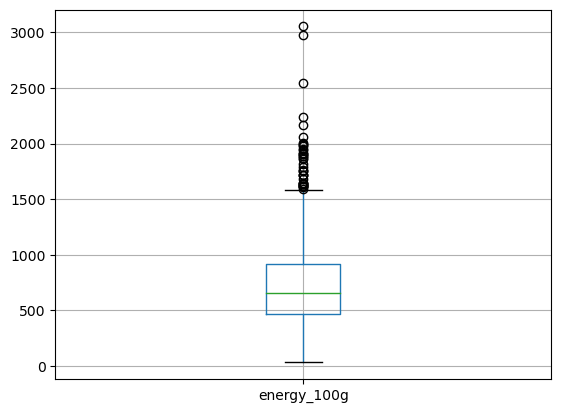

In [27]:
df1[['energy_100g']].boxplot();

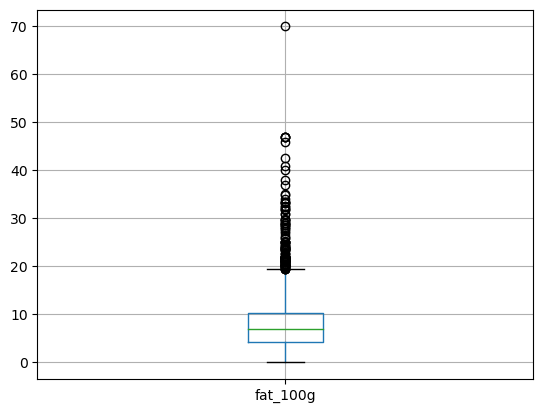

In [28]:
df1[['fat_100g']].boxplot();

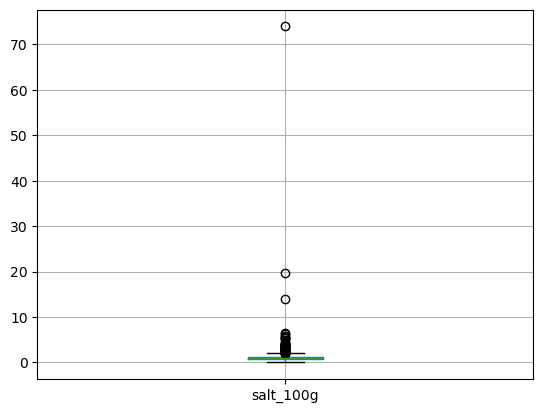

In [29]:
df1[['salt_100g']].boxplot();

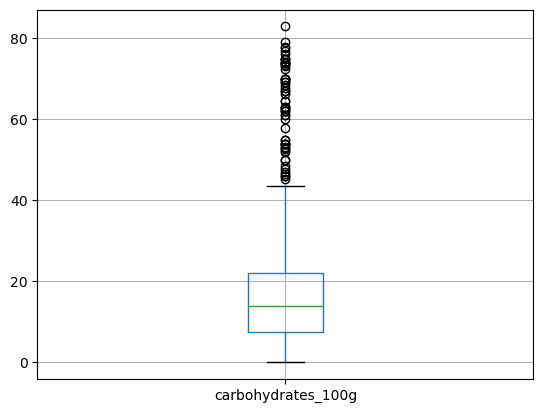

In [30]:
df1[['carbohydrates_100g']].boxplot();

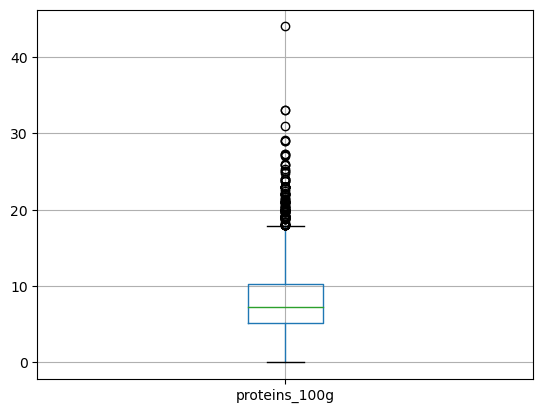

In [31]:
df1[['proteins_100g']].boxplot();

In [32]:
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3-Q1

In [33]:
dfNO=df1[~((df1<(Q1-1.5*IQR)) | (df1>(Q3+1.5*IQR)))]
dfNO

,product_name,brands,nutrition_grade_fr,energy_100g,additives_fr,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
12897,Risotto Aux Crevettes,Marks&Spencer,A,452.0,NaN,NaN,0.9,NaN,1.3,0.8,4.3,0.4500,0.177165,-1.0
16580,Pizza au thon,Toupargel,C,1052.0,E160,13.5,3.2,21.7,3.2,1.9,9.9,1.2000,0.472441,9.0
54663,Soupe rustique aux légumes à l'italienne,Amy's kitchen,A,264.0,NaN,2.9,0.4,7.3,1.6,1.6,2.0,0.7620,0.300000,-5.0
54695,"Lasagnes aux légumes, pâtes de riz sans gluten",Amy's Kitchen,B,541.0,NaN,5.5,2.7,15.0,2.4,1.6,5.5,0.7620,0.300000,1.0
54697,"4 Steaks aux légumes, au quinoa et aux noix",Amy's Kitchen,C,510.0,NaN,4.2,0.0,18.0,2.8,1.8,3.8,1.5240,0.600000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316146,Soupe Légumes du potager moulinés,Knorr,B,130.0,NaN,1.0,0.6,5.0,0.9,0.8,1.5,0.7366,0.290000,2.0
316197,4 Ch'ticanos,Bakx Foods,D,814.0,E621,11.1,3.0,11.8,1.4,NaN,11.9,1.9000,0.748031,12.0
316255,2 Meunières Tradition,Iglo,B,432.0,NaN,0.7,0.2,8.9,0.4,0.4,14.8,1.1000,0.433071,0.0
317217,Samoussas au poulet,"Authentic Asia,Charoen Pokphand,CP",C,1120.0,NaN,14.7,3.3,2.0,1.6,3.0,9.1,1.1900,0.468504,7.0


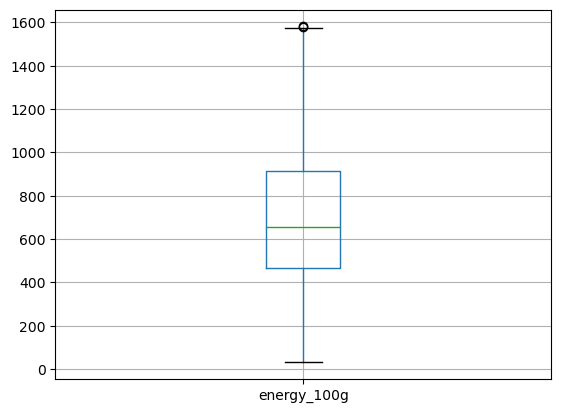

In [34]:
dfNO[['energy_100g']].boxplot();

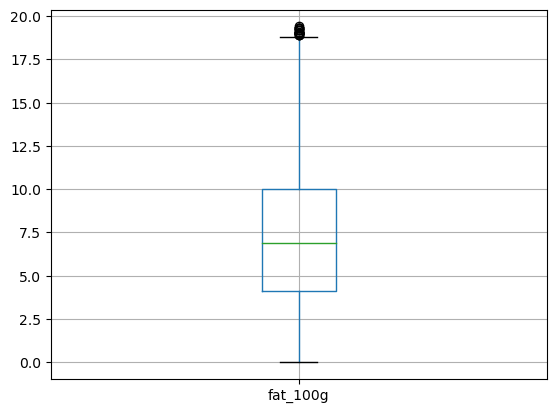

In [35]:
dfNO[['fat_100g']].boxplot();

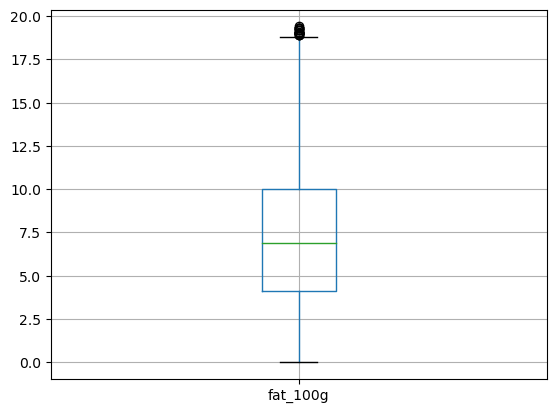

In [36]:
dfNO[['fat_100g']].boxplot();

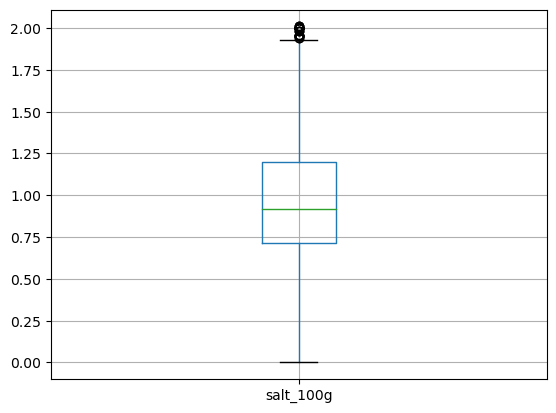

In [37]:
dfNO[['salt_100g']].boxplot();

In [38]:
dfNO.isnull().sum() 

product_name                  0
brands                       10
nutrition_grade_fr            0
energy_100g                  45
additives_fr               1397
fat_100g                    234
saturated-fat_100g          220
carbohydrates_100g          185
sugars_100g                 139
fiber_100g                 1652
proteins_100g               129
salt_100g                   116
sodium_100g                 116
nutrition-score-fr_100g     181
dtype: int64

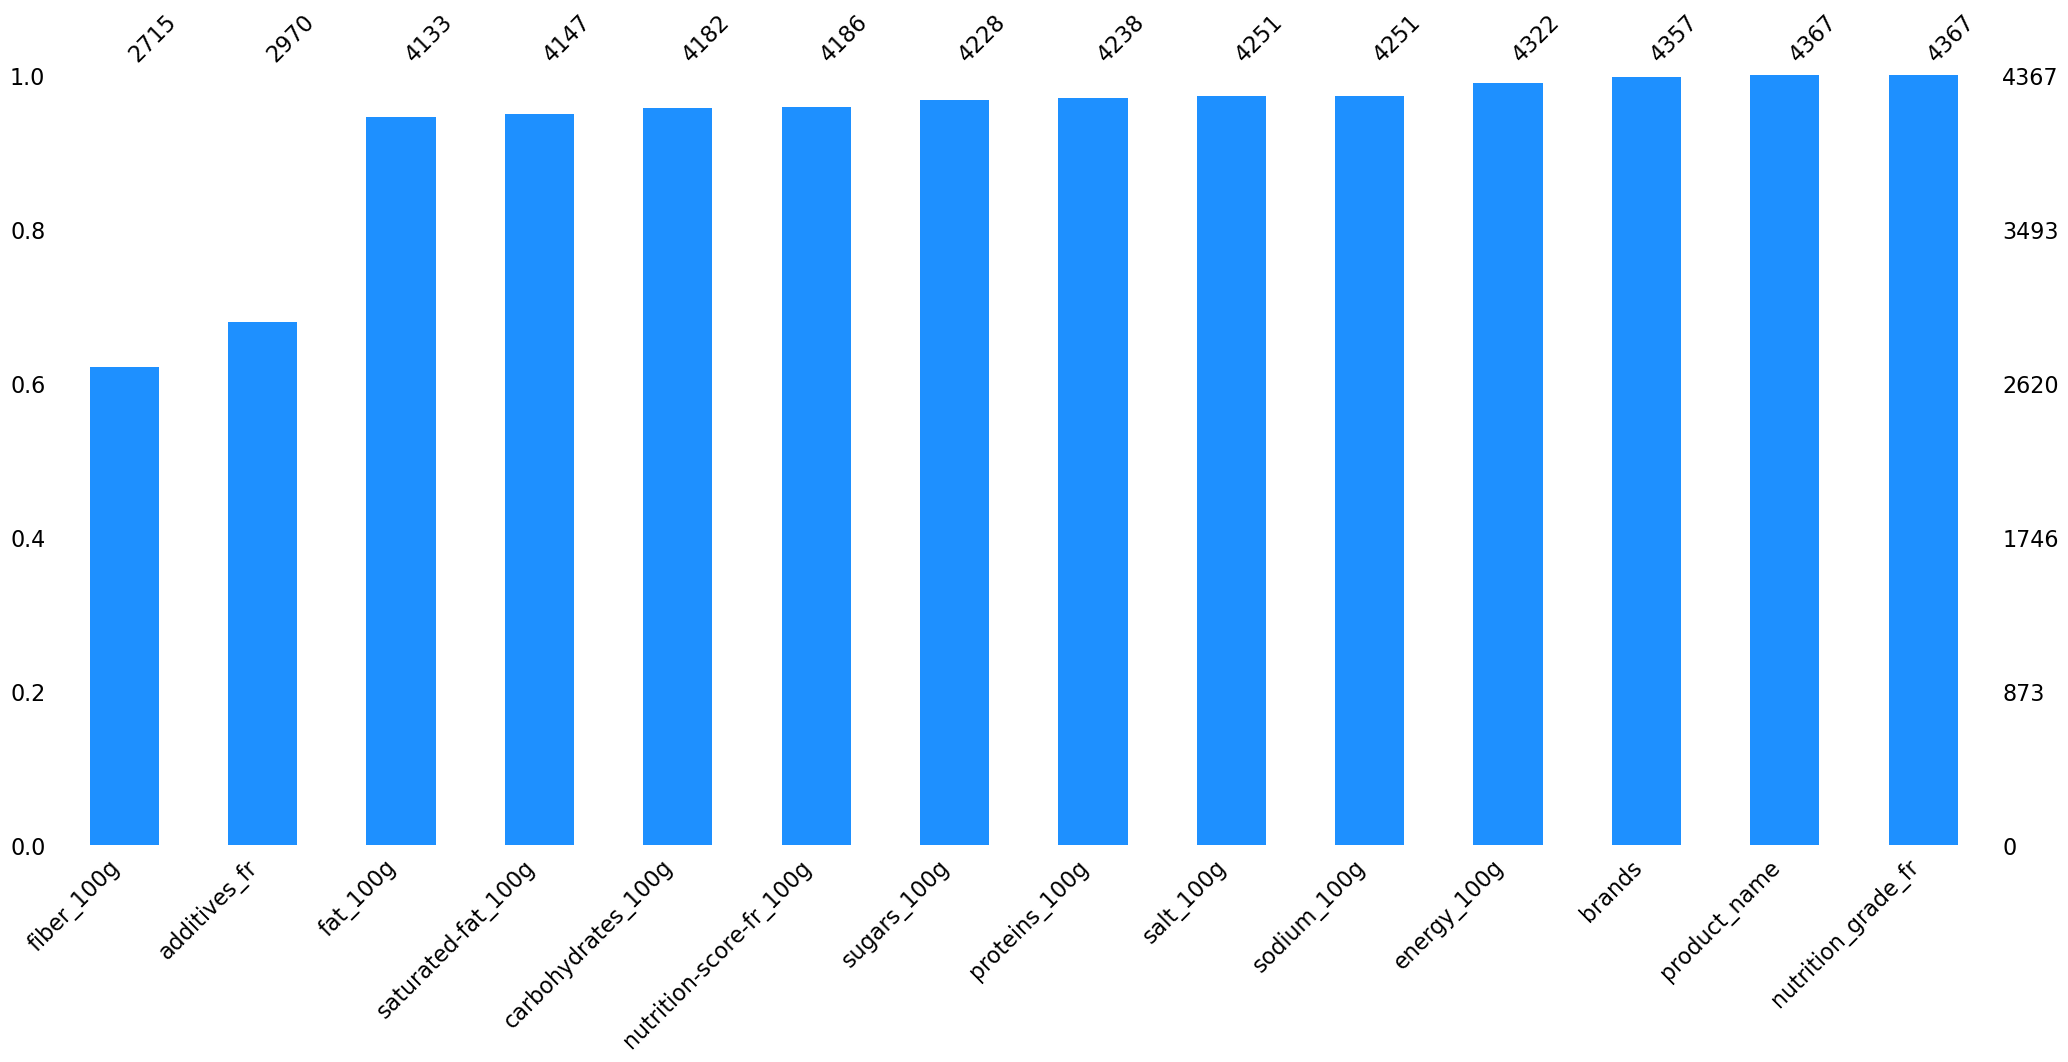

In [39]:
msno.bar(dfNO,color="dodgerblue", sort="ascending" );

In [40]:
dfNO.describe().T

,count,mean,std,min,25%,50%,75%,max
energy_100g,4322.0,689.564750,299.010263,31.0,467.0000,657.0000,912.000000,1581.000000
fat_100g,4133.0,7.336812,4.166396,0.0,4.1000,6.9000,10.000000,19.400000
saturated-fat_100g,4147.0,2.274147,1.810913,0.0,0.8000,1.8000,3.400000,7.900000
carbohydrates_100g,4182.0,14.637646,8.572271,0.0,7.4000,13.9000,21.875000,43.500000
sugars_100g,4228.0,2.129879,1.384161,0.0,1.0000,2.0000,3.000000,6.200000
fiber_100g,2715.0,1.749348,1.021118,0.0,1.0000,1.6000,2.400000,4.600000
proteins_100g,4238.0,7.509325,3.686231,0.0,5.1000,7.2000,10.000000,17.900000
salt_100g,4251.0,0.976010,0.368200,0.0,0.7112,0.9144,1.200000,2.010000
sodium_100g,4251.0,0.384256,0.144963,0.0,0.2800,0.3600,0.472441,0.791339
nutrition-score-fr_100g,4186.0,2.977544,5.056146,-9.0,0.0000,2.0000,5.000000,15.000000


In [41]:
df_num = dfNO.select_dtypes(include = ['float64', 'int64'])
df_num

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
12897,452.0,NaN,0.9,NaN,1.3,0.8,4.3,0.4500,0.177165,-1.0
16580,1052.0,13.5,3.2,21.7,3.2,1.9,9.9,1.2000,0.472441,9.0
54663,264.0,2.9,0.4,7.3,1.6,1.6,2.0,0.7620,0.300000,-5.0
54695,541.0,5.5,2.7,15.0,2.4,1.6,5.5,0.7620,0.300000,1.0
54697,510.0,4.2,0.0,18.0,2.8,1.8,3.8,1.5240,0.600000,3.0
...,...,...,...,...,...,...,...,...,...,...
316146,130.0,1.0,0.6,5.0,0.9,0.8,1.5,0.7366,0.290000,2.0
316197,814.0,11.1,3.0,11.8,1.4,NaN,11.9,1.9000,0.748031,12.0
316255,432.0,0.7,0.2,8.9,0.4,0.4,14.8,1.1000,0.433071,0.0
317217,1120.0,14.7,3.3,2.0,1.6,3.0,9.1,1.1900,0.468504,7.0


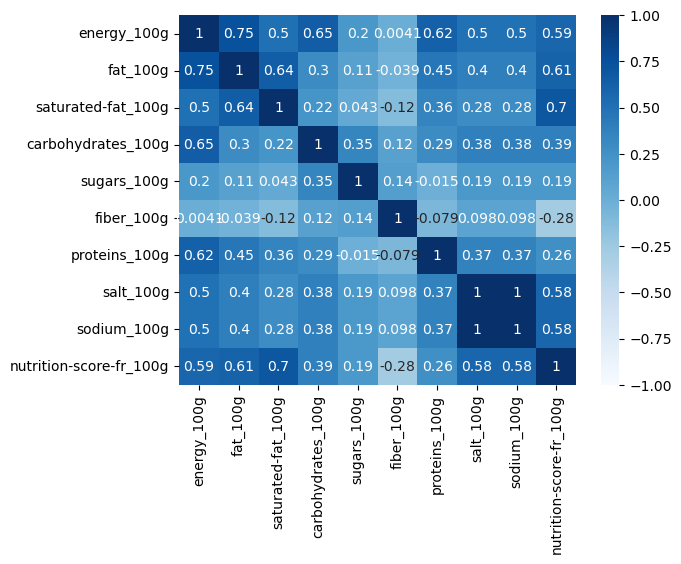

In [42]:
sns.heatmap(df_num.corr(),annot = True,  vmin = -1, vmax = 1, cmap = "Blues",)  ;

On remarque qu'il existe une forte corrélation entre energy et : fat,carbohydrates, proteins, nutrition-score.

On observe une forte corrélation entre fat et: proteins salt ,nutrition-score

In [43]:
dfNO['fiber_100g'] = dfNO['fiber_100g'].fillna(0)
dfNO

,product_name,brands,nutrition_grade_fr,energy_100g,additives_fr,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
12897,Risotto Aux Crevettes,Marks&Spencer,A,452.0,NaN,NaN,0.9,NaN,1.3,0.8,4.3,0.4500,0.177165,-1.0
16580,Pizza au thon,Toupargel,C,1052.0,E160,13.5,3.2,21.7,3.2,1.9,9.9,1.2000,0.472441,9.0
54663,Soupe rustique aux légumes à l'italienne,Amy's kitchen,A,264.0,NaN,2.9,0.4,7.3,1.6,1.6,2.0,0.7620,0.300000,-5.0
54695,"Lasagnes aux légumes, pâtes de riz sans gluten",Amy's Kitchen,B,541.0,NaN,5.5,2.7,15.0,2.4,1.6,5.5,0.7620,0.300000,1.0
54697,"4 Steaks aux légumes, au quinoa et aux noix",Amy's Kitchen,C,510.0,NaN,4.2,0.0,18.0,2.8,1.8,3.8,1.5240,0.600000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316146,Soupe Légumes du potager moulinés,Knorr,B,130.0,NaN,1.0,0.6,5.0,0.9,0.8,1.5,0.7366,0.290000,2.0
316197,4 Ch'ticanos,Bakx Foods,D,814.0,E621,11.1,3.0,11.8,1.4,0.0,11.9,1.9000,0.748031,12.0
316255,2 Meunières Tradition,Iglo,B,432.0,NaN,0.7,0.2,8.9,0.4,0.4,14.8,1.1000,0.433071,0.0
317217,Samoussas au poulet,"Authentic Asia,Charoen Pokphand,CP",C,1120.0,NaN,14.7,3.3,2.0,1.6,3.0,9.1,1.1900,0.468504,7.0


In [44]:
dfNO['additives_fr'] = dfNO['additives_fr'].fillna (dfNO['additives_fr'].mode()[0])
dfNO

,product_name,brands,nutrition_grade_fr,energy_100g,additives_fr,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
12897,Risotto Aux Crevettes,Marks&Spencer,A,452.0,E14X,NaN,0.9,NaN,1.3,0.8,4.3,0.4500,0.177165,-1.0
16580,Pizza au thon,Toupargel,C,1052.0,E160,13.5,3.2,21.7,3.2,1.9,9.9,1.2000,0.472441,9.0
54663,Soupe rustique aux légumes à l'italienne,Amy's kitchen,A,264.0,E14X,2.9,0.4,7.3,1.6,1.6,2.0,0.7620,0.300000,-5.0
54695,"Lasagnes aux légumes, pâtes de riz sans gluten",Amy's Kitchen,B,541.0,E14X,5.5,2.7,15.0,2.4,1.6,5.5,0.7620,0.300000,1.0
54697,"4 Steaks aux légumes, au quinoa et aux noix",Amy's Kitchen,C,510.0,E14X,4.2,0.0,18.0,2.8,1.8,3.8,1.5240,0.600000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316146,Soupe Légumes du potager moulinés,Knorr,B,130.0,E14X,1.0,0.6,5.0,0.9,0.8,1.5,0.7366,0.290000,2.0
316197,4 Ch'ticanos,Bakx Foods,D,814.0,E621,11.1,3.0,11.8,1.4,0.0,11.9,1.9000,0.748031,12.0
316255,2 Meunières Tradition,Iglo,B,432.0,E14X,0.7,0.2,8.9,0.4,0.4,14.8,1.1000,0.433071,0.0
317217,Samoussas au poulet,"Authentic Asia,Charoen Pokphand,CP",C,1120.0,E14X,14.7,3.3,2.0,1.6,3.0,9.1,1.1900,0.468504,7.0


In [45]:
dfNO = dfNO.fillna(dfNO.median())
dfNO

,product_name,brands,nutrition_grade_fr,energy_100g,additives_fr,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
12897,Risotto Aux Crevettes,Marks&Spencer,A,452.0,E14X,6.9,0.9,13.9,1.3,0.8,4.3,0.4500,0.177165,-1.0
16580,Pizza au thon,Toupargel,C,1052.0,E160,13.5,3.2,21.7,3.2,1.9,9.9,1.2000,0.472441,9.0
54663,Soupe rustique aux légumes à l'italienne,Amy's kitchen,A,264.0,E14X,2.9,0.4,7.3,1.6,1.6,2.0,0.7620,0.300000,-5.0
54695,"Lasagnes aux légumes, pâtes de riz sans gluten",Amy's Kitchen,B,541.0,E14X,5.5,2.7,15.0,2.4,1.6,5.5,0.7620,0.300000,1.0
54697,"4 Steaks aux légumes, au quinoa et aux noix",Amy's Kitchen,C,510.0,E14X,4.2,0.0,18.0,2.8,1.8,3.8,1.5240,0.600000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316146,Soupe Légumes du potager moulinés,Knorr,B,130.0,E14X,1.0,0.6,5.0,0.9,0.8,1.5,0.7366,0.290000,2.0
316197,4 Ch'ticanos,Bakx Foods,D,814.0,E621,11.1,3.0,11.8,1.4,0.0,11.9,1.9000,0.748031,12.0
316255,2 Meunières Tradition,Iglo,B,432.0,E14X,0.7,0.2,8.9,0.4,0.4,14.8,1.1000,0.433071,0.0
317217,Samoussas au poulet,"Authentic Asia,Charoen Pokphand,CP",C,1120.0,E14X,14.7,3.3,2.0,1.6,3.0,9.1,1.1900,0.468504,7.0


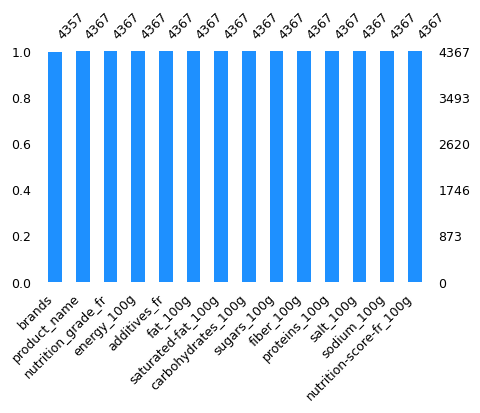

In [46]:
msno.bar(dfNO,color="dodgerblue", sort="ascending", figsize=(5, 3), fontsize=9 );

In [47]:
dfNO.to_csv(r'C:\Users\Z9220403\Desktop\my_data.csv', index=False)